# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340561 entries, 0 to 2340560
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21095
Address                             12
Zip Code                         14548
Council District                 47543
APD Sector                        9256
APD District                      9744
PRA                              11042
Census Tract                    466862
Clearance Status                611125
Clearance Date                  341933
UCR Category                   1540506
Category Description           1540506
X-coordinate                     10441
Y-coordinate                     10441
Latitude                         39668
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number  Highest Offense Description  Highest Offense Code  \
2340556      20143631822           FAMILY DISTURBANCE                  3400   
2340557      20191270738         THEFT BY SHOPLIFTING                   607   
2340558       2008501470  CRIMINAL TRESPASS/TRANSIENT                  2721   
2340559    2003921400113                          DWI                  2100   
2340560      20081340129    URINATING IN PUBLIC PLACE                  3212   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2340556               N  12/29/2014 11:41:00 PM    12/29/2014         2341.0   
2340557               N  05/07/2019 10:50:00 AM    05/07/2019         1050.0   
2340558               N  02/19/2008 05:00:00 PM    02/19/2008         1700.0   
2340559               N  05/20/2003 01:32:00 AM    05/20/2003          132.0   
2340560               N  05/13/2008 01:10:00 AM    05/13/2008          110.0   

               Report Date Time Report Date  Report Time  \
2340556  12/29/2014 11:41:00 PM  12/29/2014       2341.0   
2340557  05/07/2019 11:31:00 AM  05/07/2019       1131.0   
2340558  02/19/2008 05:00:00 PM  02/19/2008       1700.0   
2340559  05/20/2003 01:32:00 AM  05/20/2003        132.0   
2340560  05/13/2008 01:10:00 AM  05/13/2008        110.0   

                        Location Type               Address  Zip Code  \
2340556              RESIDENCE / HOME    109 MASTERSON PASS   78753.0   
2340557   DEPARTMENT / DISCOUNT STORE    11423 N LAMAR BLVD   78753.0   
2340558         PARKING LOTS / GARAGE       6800 BERKMAN DR   78723.0   
2340559  STREETS / HWY / ROAD / ALLEY  4500 N MOPAC EXPY NB   78731.0   
2340560  STREETS / HWY / ROAD / ALLEY    400 BLOCK E 6TH ST   78701.0   

         Council District APD Sector APD District  PRA  Census Tract  \
2340556               4.0         ED            1  240         18.23   
2340557               7.0         ED            4  221         18.24   
2340558               1.0         ID            5  293         21.00   
2340559              10.0         BA            6  325          1.00   
2340560               9.0         GE            2  382         11.00   

        Clearance Status Clearance Date UCR Category Category Description  \
2340556                N     01/02/2015          NaN                  NaN   
2340557              NaN            NaN          23C                Theft   
2340558              NaN            NaN          NaN                  NaN   
2340559                C     05/22/2003          NaN                  NaN   
2340560                C     05/17/2008          NaN                  NaN   

         X-coordinate  Y-coordinate   Latitude  Longitude  \
2340556     3130776.0     3130776.0  30.369795 -97.687855   
2340557     3131578.0     3131578.0  30.383630 -97.684932   
2340558     3130390.0     3130390.0  30.320281 -97.690437   
2340559     3109748.0     3109748.0  30.320565 -97.755869   
2340560     3115491.0     3115491.0  30.267351 -97.739093   

                            Location  
2340556  (30.36979494, -97.68785533)  
2340557  (30.38362955, -97.68493154)  
2340558   (30.32028083, -97.6904366)  
2340559   (30.32056515, -97.7558693)  
2340560  (30.26735144, -97.73909331)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

702

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339859 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01          SEXUAL ASSAULT OF CHILD/OBJECT           False   
2003-01-01                     FORGERY AND PASSING           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          AGG SEXUAL ASSAULT CHILD/OBJEC           False   

                      report_date_time                 location_type  \
occurred_date_time                                                     
2003-01-01         2005-03-31 16:40:00              RESIDENCE / HOME   
2003-01-01         2003-09-13 09:35:00  COMMERCIAL / OFFICE BUILDING   
2003-01-01         2003-10-06 10:52:00              RESIDENCE / HOME   
2003-01-01         2011-02-08 15:14:00              RESIDENCE / HOME   
2003-01-01         2008-09-17 11:43:00              RESIDENCE / HOME   

                                         address zip_code council_district  \
occurred_date_time                                                           
2003-01-01          6600 BLOCK ED BLUESTEIN BLVD  78723.0              NaN   
2003-01-01                        8501 BURNET RD  78757.0              7.0   
2003-01-01                    5708 WHITEBROOK DR  78724.0              1.0   
2003-01-01                          8220 W SH 71  78735.0              8.0   
2003-01-01             2500 BLOCK S CONGRESS AVE  78704.0              3.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
2003-01-01                 ED            3  299.0      2201.00   
2003-01-01                 ID            7  234.0        18.18   
2003-01-01                 CH            7  300.0        22.00   
2003-01-01                 DA            6   61.0        19.08   
2003-01-01                 DA            2  479.0        23.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
2003-01-01                     True     2005-07-12                 Rape   
2003-01-01                      NaN     2003-09-15                  NaN   
2003-01-01                      NaN     2003-10-31                  NaN   
2003-01-01                    False     2011-05-23                  NaN   
2003-01-01                    False     2008-10-27                 Rape   

                     latitude  longitude    year  month  week  day  hour  
occurred_date_time                                                        
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.366117 -97.727721  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.305744 -97.655117  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.246747 -97.887325  2003.0    1.0   1.0  1.0   0.0  
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                                 
NaT                            SUSPICIOUS PERSON           False   
NaT                            SUSPICIOUS PERSON           False   
NaT                 POSS CONTROLLED SUB/NARCOTIC           False   
NaT                                RUNAWAY CHILD           False   
NaT                          BURGLARY OF VEHICLE           False   

                      report_date_time     location_type  \
occurred_date_time                                         
NaT                2005-05-24 20:14:00               NaN   
NaT                2008-01-11 10:33:00               NaN   
NaT                2007-04-04 18:39:00               NaN   
NaT                2004-02-24 22:55:00               NaN   
NaT                2003-05-06 10:47:00  RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            8200 GEORGIAN DR  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                                1511 FARO DR  78741.0              3.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                         1908 SAN ANTONIO ST  78705.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0        18.00   
NaT                        GE            2  381.0        11.00   
NaT                        HE            3  442.0        23.17   
NaT                        DA            1  476.0        13.00   
NaT                        BA            1  359.0         6.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False     2005-06-28                  NaN   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2007-07-25                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                           False            NaT                Theft   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.347657 -97.703221   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.235041 -97.713595   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.282945 -97.743406   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    209593
78753.0    181891
78701.0    170508
78758.0    162381
78704.0    157051
78745.0    153181
78702.0    138295
78744.0    128259
78723.0    120289
78752.0     85735
78748.0     69427
78759.0     67651
78751.0     65201
78757.0     58949
78705.0     58055
78721.0     48395
78749.0     41067
78724.0     38269
78727.0     36601
78703.0     35786
78731.0     29280
78746.0     28519
78729.0     25871
78750.0     24221
78754.0     23481

zip_code
78741.0  0.090135
78753.0  0.078222
78701.0  0.073327
78758.0  0.069832
78704.0  0.067540
78745.0  0.065875
78702.0  0.059474
78744.0  0.055158
78723.0  0.051730
78752.0  0.036870
78748.0  0.029857
78759.0  0.029093
78751.0  0.028040
78757.0  0.025351
78705.0  0.024967
78721.0  0.020812
78749.0  0.017661
78724.0  0.016458
78727.0  0.015740
78703.0  0.015390
78731.0  0.012592
78746.0  0.012265
78729.0  0.011126
78750.0  0.010416
78754.0  0.010098

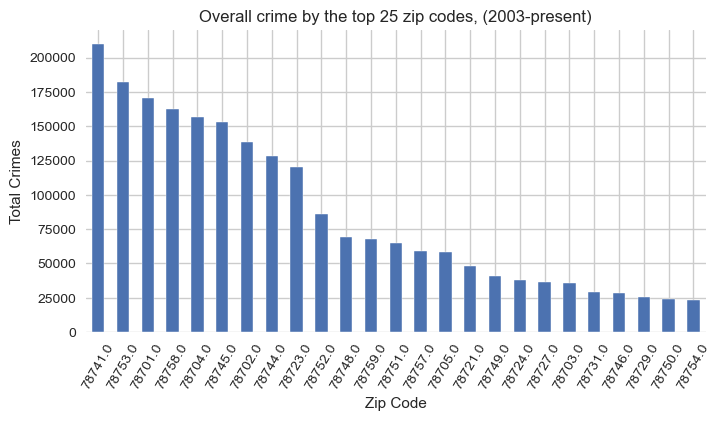

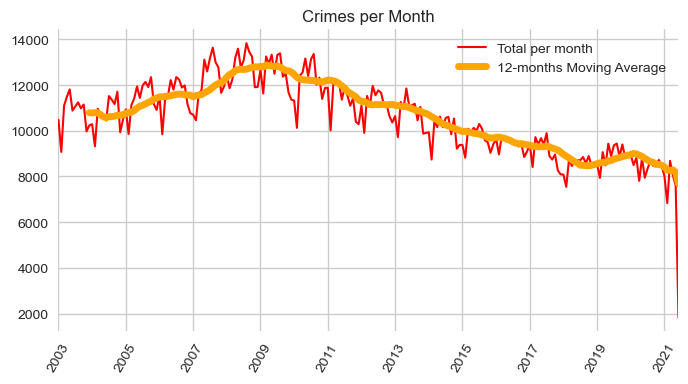

In [10]:
plt.style.use("seaborn")
sb.set_style("whitegrid")
%matplotlib inline

# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(dpi=100, figsize=(8, 4))
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(dpi=100, figsize=(8, 4))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  232720
THEFT                                                213937
FAMILY DISTURBANCE                                   183235
CRIMINAL MISCHIEF                                    129276
ASSAULT W/INJURY-FAM/DATE VIOL                        79199
BURGLARY OF RESIDENCE                                 77736
DWI                                                   70213
PUBLIC INTOXICATION                                   69042
HARASSMENT                                            65083
DISTURBANCE - OTHER                                   62513

BURGLARY OF VEHICLE  BURGLARY OF RESIDENCE  HARASSMENT  \
occurred_date_time                                                           
2003-01-31                         1225                    328         293   
2003-02-28                         1110                    248         309   
2003-03-31                         1222                    393         363   
2003-04-30                         1396                    398         353   
2003-05-31                         1487                    436         345   
...                                 ...                    ...         ...   
2021-02-28                          309                    119         167   
2021-03-31                          431                    154         194   
2021-04-30                          367                    130         168   
2021-05-31                          348                    154         142   
2021-06-30                           80                     42          38   

                    CRIMINAL MISCHIEF  ASSAULT W/INJURY-FAM/DATE VIOL  \
occurred_date_time                                                      
2003-01-31                        722                             349   
2003-02-28                        594                             342   
2003-03-31                        700                             421   
2003-04-30                        709                             432   
2003-05-31                        750                             424   
...                               ...                             ...   
2021-02-28                        339                             245   
2021-03-31                        430                             259   
2021-04-30                        415                             268   
2021-05-31                        388                             311   
2021-06-30                         77                              78   

                    PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  TOTAL  
occurred_date_time                                                       
2003-01-31                          341  407                 505   4170  
2003-02-28                          354  328                 500   3785  
2003-03-31                          450  406                 546   4501  
2003-04-30                          385  375                 678   4726  
2003-05-31                          451  418                 650   4961  
...                                 ...  ...                 ...    ...  
2021-02-28                           62  130                 812   2183  
2021-03-31                           75  179                 876   2598  
2021-04-30                           67  124                 799   2338  
2021-05-31                           61  139                 884   2427  
2021-06-30                           23   37                 171    546  

[222 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

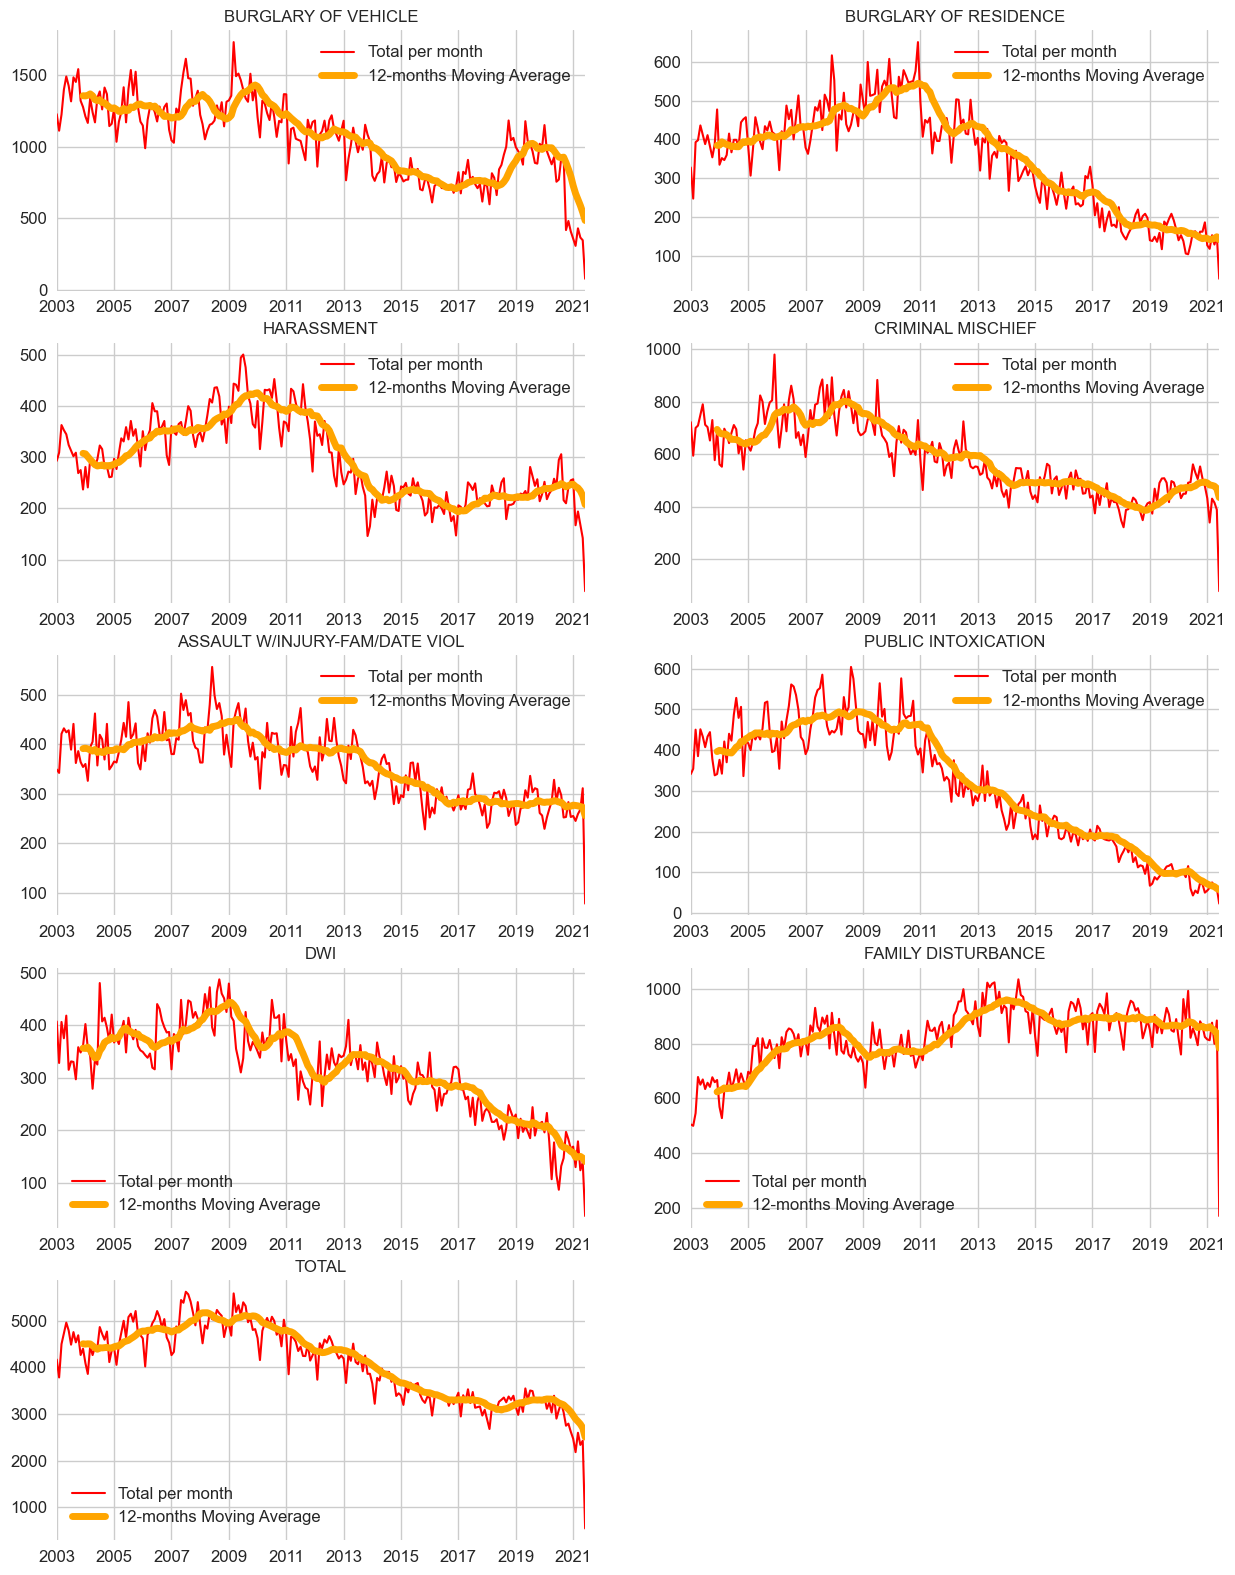

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17214
THEFT                                                 15976
BURGLARY OF VEHICLE                                    9351
WARRANT ARREST NON TRAFFIC                             8968
DWI                                                    8358
ASSAULT WITH INJURY                                    7664
VIOL CITY ORDINANCE - OTHER                            6192
POSS OF DRUG PARAPHERNALIA                             6100
CRIMINAL MISCHIEF                                      5928
CRIMINAL TRESPASS                                      3966
POSSESSION OF MARIJUANA                                3409
DISTURBANCE - OTHER                                    3399
CUSTODY ARREST TRAFFIC WARR                            2993
POSS CONTROLLED SUB/NARCOTIC                           2929
CAMPING IN PARK                                        2785
VOCO - ALCOHOL  CONSUMPTION                            2690
ASSAULT BY CONTACT                                     2641
CRIMINAL TRESPASS/TRANSIENT                            2595
THEFT OF BICYCLE                                       2549
URINATING IN PUBLIC PLACE                              2337
FAMILY DISTURBANCE                                     2216
DOC FIGHTING                                           2144
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1750

highest_offense_description
PUBLIC INTOXICATION                                0.100957
THEFT                                              0.093696
BURGLARY OF VEHICLE                                0.054842
WARRANT ARREST NON TRAFFIC                         0.052596
DWI                                                0.049018
ASSAULT WITH INJURY                                0.044948
VIOL CITY ORDINANCE - OTHER                        0.036315
POSS OF DRUG PARAPHERNALIA                         0.035775
CRIMINAL MISCHIEF                                  0.034767
CRIMINAL TRESPASS                                  0.023260
POSSESSION OF MARIJUANA                            0.019993
DISTURBANCE - OTHER                                0.019935
CUSTODY ARREST TRAFFIC WARR                        0.017553
POSS CONTROLLED SUB/NARCOTIC                       0.017178
CAMPING IN PARK                                    0.016334
VOCO - ALCOHOL  CONSUMPTION                        0.015776
ASSAULT BY CONTACT                                 0.015489
CRIMINAL TRESPASS/TRANSIENT                        0.015219
THEFT OF BICYCLE                                   0.014949
URINATING IN PUBLIC PLACE                          0.013706
FAMILY DISTURBANCE                                 0.012996
DOC FIGHTING                                       0.012574
PROTECTIVE ORDER                                   0.012310
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010263

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

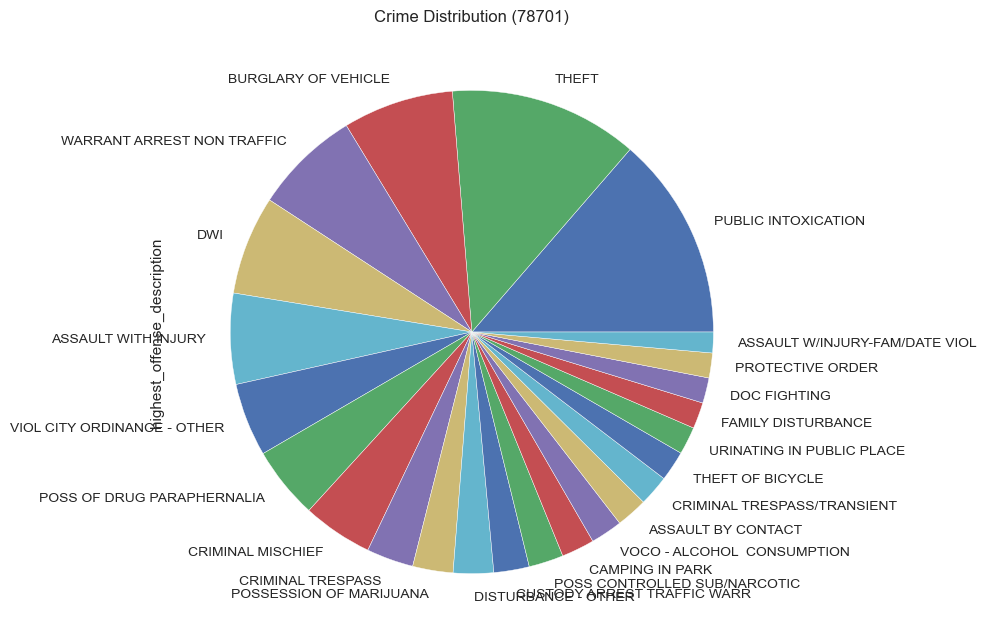

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17293
BURGLARY OF VEHICLE                                   16045
FAMILY DISTURBANCE                                    14955
CRIMINAL MISCHIEF                                      9594
THEFT BY SHOPLIFTING                                   7719
ASSAULT W/INJURY-FAM/DATE VIOL                         7284
BURGLARY OF RESIDENCE                                  6122
DWI                                                    5093
DISTURBANCE - OTHER                                    4847
CUSTODY ARREST TRAFFIC WARR                            4354
AUTO THEFT                                             4345
HARASSMENT                                             4318
POSS OF DRUG PARAPHERNALIA                             3741
ASSAULT WITH INJURY                                    3395
PUBLIC INTOXICATION                                    3379
CRIMINAL TRESPASS                                      3187
POSS CONTROLLED SUB/NARCOTIC                           3017
RUNAWAY CHILD                                          2967
WARRANT ARREST NON TRAFFIC                             2799
POSSESSION OF MARIJUANA                                2717
BURGLARY NON RESIDENCE                                 2527
VIOL CITY ORDINANCE - OTHER                            1871

----------------------------------


highest_offense_description
THEFT                                              0.095073
BURGLARY OF VEHICLE                                0.088212
FAMILY DISTURBANCE                                 0.082220
CRIMINAL MISCHIEF                                  0.052746
THEFT BY SHOPLIFTING                               0.042438
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040046
BURGLARY OF RESIDENCE                              0.033658
DWI                                                0.028000
DISTURBANCE - OTHER                                0.026648
CUSTODY ARREST TRAFFIC WARR                        0.023937
AUTO THEFT                                         0.023888
HARASSMENT                                         0.023739
POSS OF DRUG PARAPHERNALIA                         0.020567
ASSAULT WITH INJURY                                0.018665
PUBLIC INTOXICATION                                0.018577
CRIMINAL TRESPASS                                  0.017521
POSS CONTROLLED SUB/NARCOTIC                       0.016587
RUNAWAY CHILD                                      0.016312
WARRANT ARREST NON TRAFFIC                         0.015388
POSSESSION OF MARIJUANA                            0.014938
BURGLARY NON RESIDENCE                             0.013893
VIOL CITY ORDINANCE - OTHER                        0.010286

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

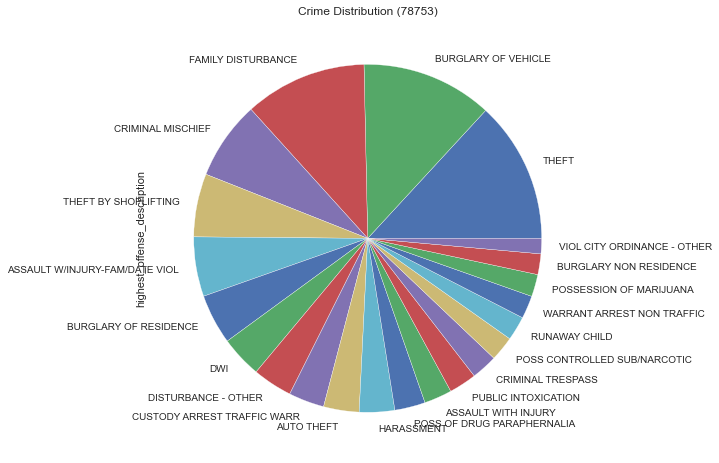

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20686
BURGLARY OF VEHICLE                                   19943
THEFT                                                 15758
CRIMINAL MISCHIEF                                     11161
ASSAULT W/INJURY-FAM/DATE VIOL                         9731
BURGLARY OF RESIDENCE                                  8950
PUBLIC INTOXICATION                                    6403
CUSTODY ARREST TRAFFIC WARR                            6011
DWI                                                    5712
HARASSMENT                                             5596
DISTURBANCE - OTHER                                    5237
AUTO THEFT                                             4745
ASSAULT WITH INJURY                                    4600
CRIMINAL TRESPASS                                      3984
POSS CONTROLLED SUB/NARCOTIC                           3910
POSSESSION OF MARIJUANA                                3806
THEFT BY SHOPLIFTING                                   3599
POSS OF DRUG PARAPHERNALIA                             3554
WARRANT ARREST NON TRAFFIC                             3448
RUNAWAY CHILD                                          2813
VIOL CITY ORDINANCE - OTHER                            2197

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098696
BURGLARY OF VEHICLE                                0.095151
THEFT                                              0.075184
CRIMINAL MISCHIEF                                  0.053251
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046428
BURGLARY OF RESIDENCE                              0.042702
PUBLIC INTOXICATION                                0.030550
CUSTODY ARREST TRAFFIC WARR                        0.028679
DWI                                                0.027253
HARASSMENT                                         0.026699
DISTURBANCE - OTHER                                0.024987
AUTO THEFT                                         0.022639
ASSAULT WITH INJURY                                0.021947
CRIMINAL TRESPASS                                  0.019008
POSS CONTROLLED SUB/NARCOTIC                       0.018655
POSSESSION OF MARIJUANA                            0.018159
THEFT BY SHOPLIFTING                               0.017171
POSS OF DRUG PARAPHERNALIA                         0.016957
WARRANT ARREST NON TRAFFIC                         0.016451
RUNAWAY CHILD                                      0.013421
VIOL CITY ORDINANCE - OTHER                        0.010482

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

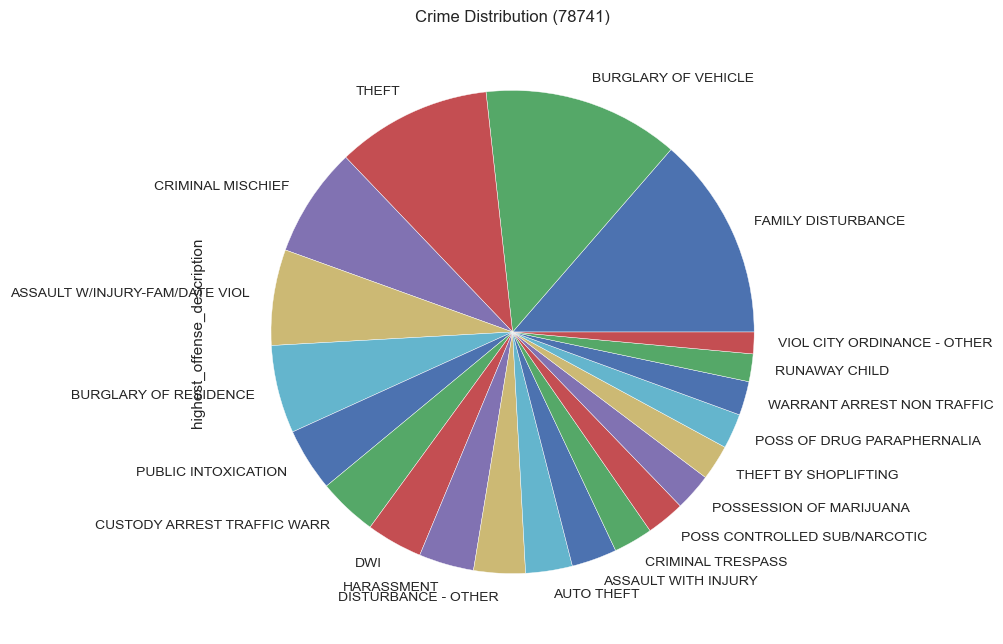

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15228
BURGLARY OF VEHICLE                                   14804
THEFT                                                 13684
CRIMINAL MISCHIEF                                      8636
BURGLARY OF RESIDENCE                                  5895
ASSAULT W/INJURY-FAM/DATE VIOL                         5823
HARASSMENT                                             5182
DISTURBANCE - OTHER                                    4583
DWI                                                    4457
PUBLIC INTOXICATION                                    4016
CUSTODY ARREST TRAFFIC WARR                            3248
AUTO THEFT                                             2936
BURGLARY NON RESIDENCE                                 2900
ASSAULT WITH INJURY                                    2734
RUNAWAY CHILD                                          2623
POSSESSION OF MARIJUANA                                2598
WARRANT ARREST NON TRAFFIC                             2113
POSS CONTROLLED SUB/NARCOTIC                           2060
THEFT BY SHOPLIFTING                                   2024
CRIMINAL TRESPASS                                      1981
IDENTITY THEFT                                         1680
POSS OF DRUG PARAPHERNALIA                             1529

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.099412
BURGLARY OF VEHICLE                                0.096644
THEFT                                              0.089332
CRIMINAL MISCHIEF                                  0.056378
BURGLARY OF RESIDENCE                              0.038484
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038014
HARASSMENT                                         0.033829
DISTURBANCE - OTHER                                0.029919
DWI                                                0.029096
PUBLIC INTOXICATION                                0.026217
CUSTODY ARREST TRAFFIC WARR                        0.021204
AUTO THEFT                                         0.019167
BURGLARY NON RESIDENCE                             0.018932
ASSAULT WITH INJURY                                0.017848
RUNAWAY CHILD                                      0.017124
POSSESSION OF MARIJUANA                            0.016960
WARRANT ARREST NON TRAFFIC                         0.013794
POSS CONTROLLED SUB/NARCOTIC                       0.013448
THEFT BY SHOPLIFTING                               0.013213
CRIMINAL TRESPASS                                  0.012932
IDENTITY THEFT                                     0.010967
POSS OF DRUG PARAPHERNALIA                         0.009982

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

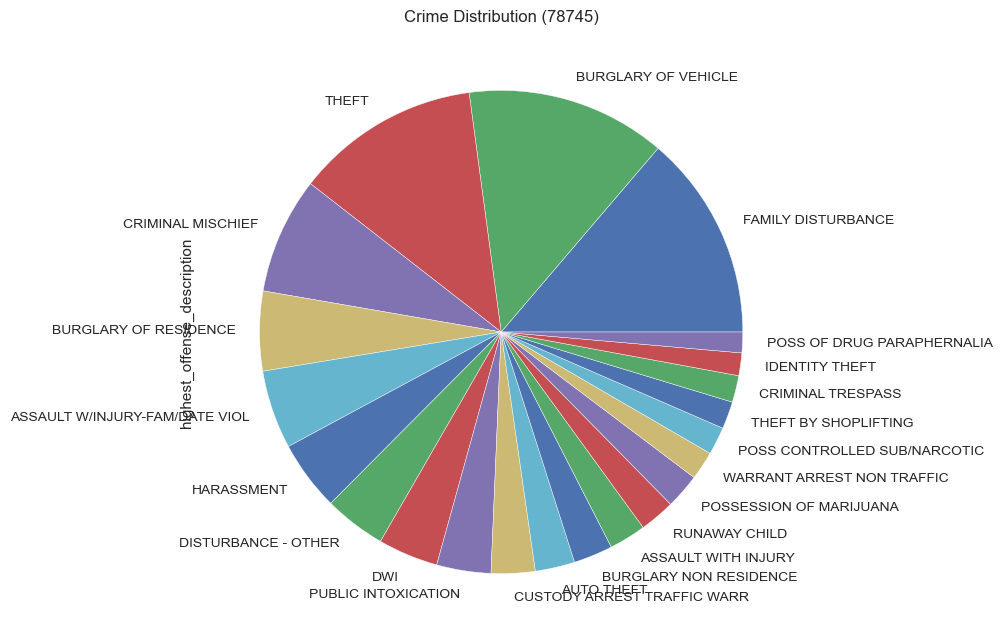

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8710
THEFT                                                  5666
CRIMINAL MISCHIEF                                      5018
THEFT OF BICYCLE                                       3546
PUBLIC INTOXICATION                                    2632
BURGLARY OF RESIDENCE                                  2137
WARRANT ARREST NON TRAFFIC                             1551
AUTO THEFT                                             1376
CRIMINAL TRESPASS                                      1375
ASSAULT WITH INJURY                                    1277
HARASSMENT                                             1237
FAMILY DISTURBANCE                                     1228
DWI                                                    1220
DISTURBANCE - OTHER                                    1129
BURGLARY NON RESIDENCE                                  891
CRIMINAL TRESPASS/TRANSIENT                             868
VIOL CITY ORDINANCE - OTHER                             792
GRAFFITI                                                786
CUSTODY ARREST TRAFFIC WARR                             782
ASSAULT W/INJURY-FAM/DATE VIOL                          708
POSSESSION OF MARIJUANA                                 664
ASSAULT BY CONTACT                                      629

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.150030
THEFT                                              0.097597
CRIMINAL MISCHIEF                                  0.086435
THEFT OF BICYCLE                                   0.061080
PUBLIC INTOXICATION                                0.045336
BURGLARY OF RESIDENCE                              0.036810
WARRANT ARREST NON TRAFFIC                         0.026716
AUTO THEFT                                         0.023702
CRIMINAL TRESPASS                                  0.023684
ASSAULT WITH INJURY                                0.021996
HARASSMENT                                         0.021307
FAMILY DISTURBANCE                                 0.021152
DWI                                                0.021015
DISTURBANCE - OTHER                                0.019447
BURGLARY NON RESIDENCE                             0.015348
CRIMINAL TRESPASS/TRANSIENT                        0.014951
VIOL CITY ORDINANCE - OTHER                        0.013642
GRAFFITI                                           0.013539
CUSTODY ARREST TRAFFIC WARR                        0.013470
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012195
POSSESSION OF MARIJUANA                            0.011437
ASSAULT BY CONTACT                                 0.010835

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

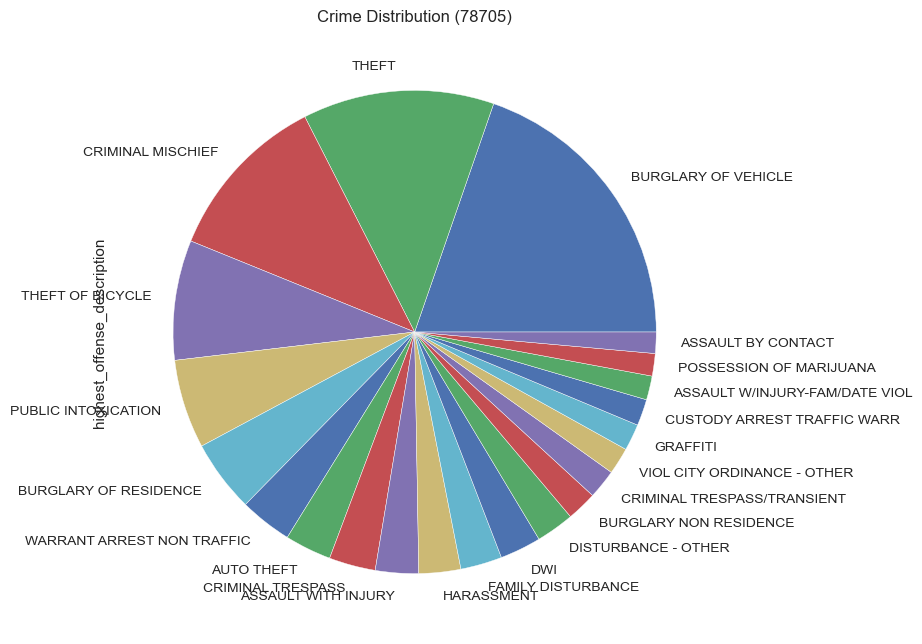

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5442
THEFT                                                  5115
THEFT BY SHOPLIFTING                                   2561
CRIMINAL MISCHIEF                                      1282
DWI                                                     891
FAMILY DISTURBANCE                                      777
VIOL CITY ORDINANCE - OTHER                             652
HARASSMENT                                              637
AUTO THEFT                                              614
BURGLARY OF RESIDENCE                                   524
THEFT FROM PERSON                                       462
IDENTITY THEFT                                          452
DISTURBANCE - OTHER                                     439
BURGLARY NON RESIDENCE                                  358
ASSAULT W/INJURY-FAM/DATE VIOL                          342
CRED CARD ABUSE - OTHER                                 331
PUBLIC INTOXICATION                                     321
POSSESSION OF MARIJUANA                                 297
FRAUD - OTHER                                           284
SUSPICIOUS PERSON                                       259
CUSTODY ARREST TRAFFIC WARR                             247
WARRANT ARREST NON TRAFFIC                              223
ASSAULT WITH INJURY                                     200
THEFT OF BICYCLE                                        195

highest_offense_description
BURGLARY OF VEHICLE                                0.190820
THEFT                                              0.179354
THEFT BY SHOPLIFTING                               0.089800
CRIMINAL MISCHIEF                                  0.044952
DWI                                                0.031242
FAMILY DISTURBANCE                                 0.027245
VIOL CITY ORDINANCE - OTHER                        0.022862
HARASSMENT                                         0.022336
AUTO THEFT                                         0.021530
BURGLARY OF RESIDENCE                              0.018374
THEFT FROM PERSON                                  0.016200
IDENTITY THEFT                                     0.015849
DISTURBANCE - OTHER                                0.015393
BURGLARY NON RESIDENCE                             0.012553
ASSAULT W/INJURY-FAM/DATE VIOL                     0.011992
CRED CARD ABUSE - OTHER                            0.011606
PUBLIC INTOXICATION                                0.011256
POSSESSION OF MARIJUANA                            0.010414
FRAUD - OTHER                                      0.009958
SUSPICIOUS PERSON                                  0.009082
CUSTODY ARREST TRAFFIC WARR                        0.008661
WARRANT ARREST NON TRAFFIC                         0.007819
ASSAULT WITH INJURY                                0.007013
THEFT OF BICYCLE                                   0.006838

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

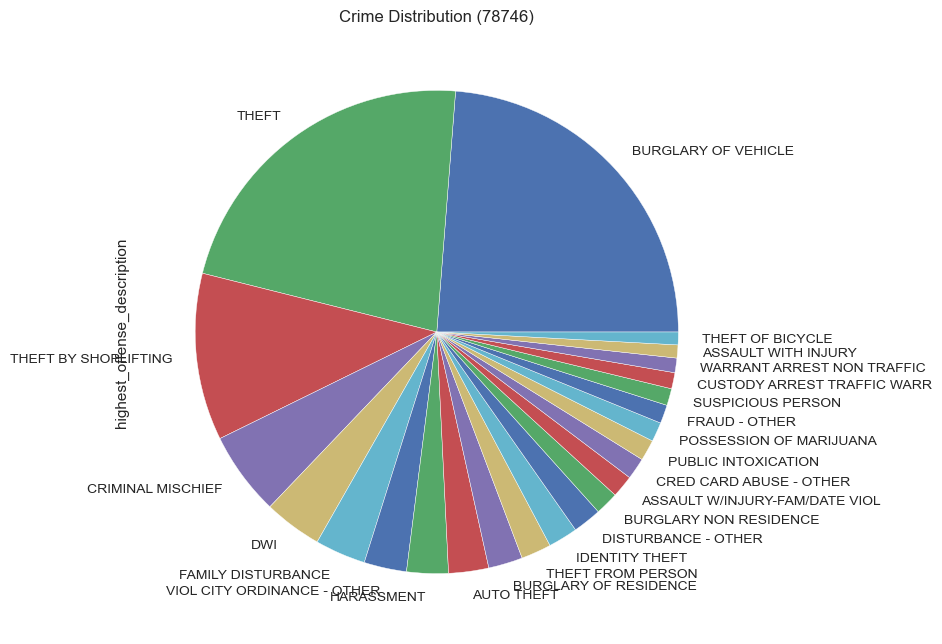

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates

"""First, I wanted to update the naming of the offense types to make everything more presentable, 
including combining 'CAPITAL MURDER' with 'MURDER'."""

# df.highest_offense_description = df.highest_offense_description.replace(
#    {
#        "CAPITAL MURDER": "MURDER",
#        "AGG ROBBERY/DEADLY WEAPON": "ARMED ROBBERY",
#        "AGG ASSAULT": "AGGRAVATED ASSAULT",
#    }
# )

df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

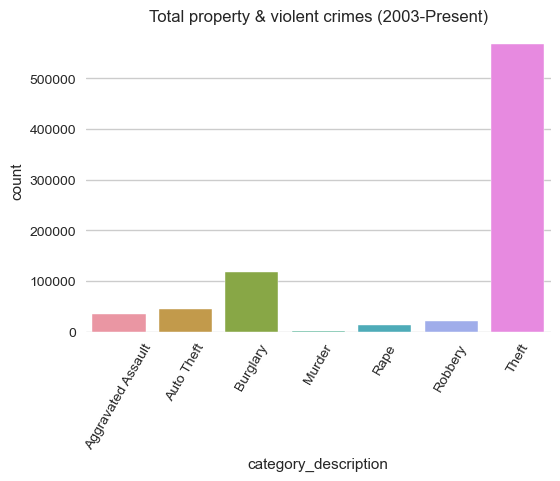

Theft                 568065
Burglary              116897
Auto Theft             44742
Aggravated Assault     35505
Robbery                20387
Rape                   13533
Murder                   545
Name: category_description, dtype: int64

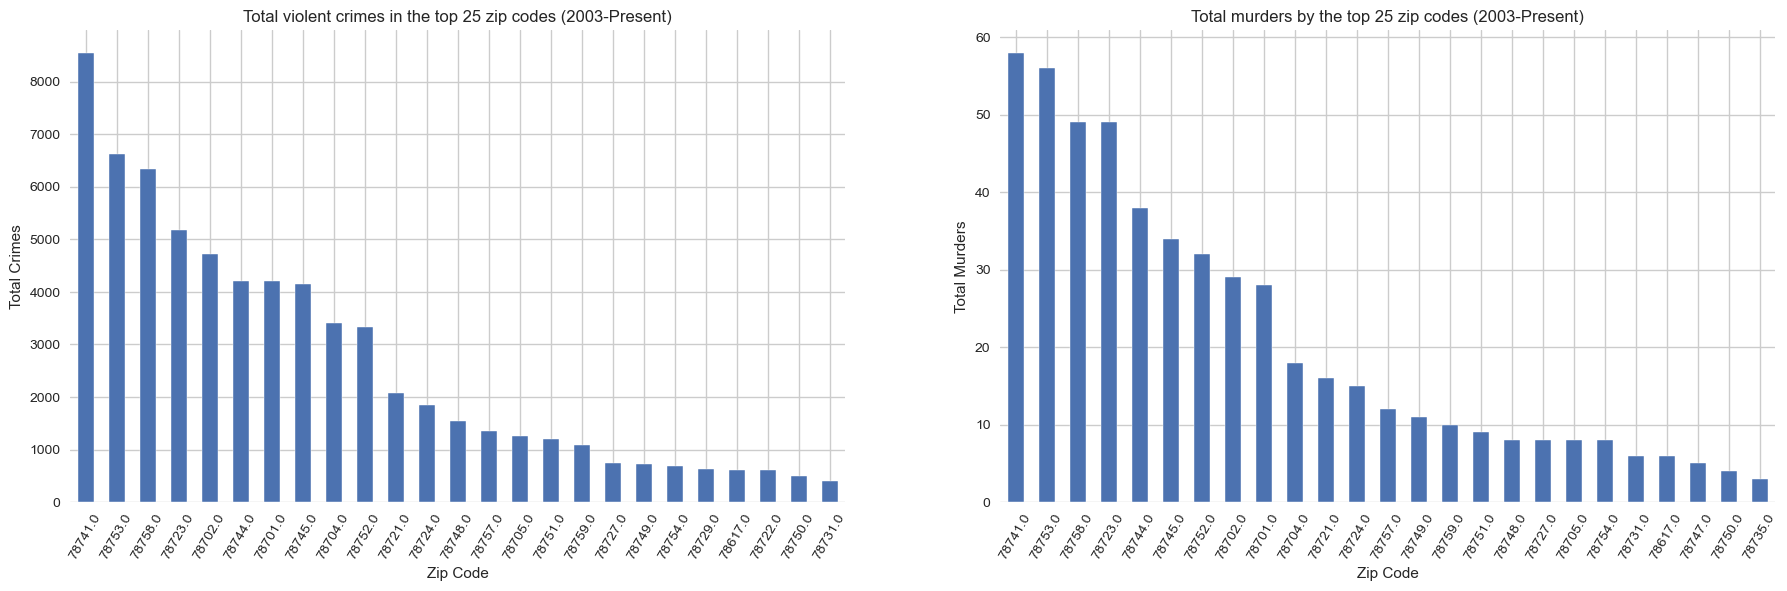

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    29       58
78617.0                              350       6   157      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                7       0     1        1
78653.0                               36       1     7        5
78660.0                              153       3    42       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2054      28   770     1349
78702.0                             2426      29   615     1654
78703.0                              166       2    85      113
78704.0                             1630      18   774      985
78705.0                              496       8   449      312
78712.0                                1       0     3        0
78717.0                              152       1    46       39
78719.0                               26       0     3       10
78721.0                             1300      16   311      444
78722.0                              268       3    98      241
78723.0                             2585      49   806     1745
78724.0                             1143      15   354      341
78725.0                               76       1    43       13
78726.0                              172       2    93       32
78727.0                              415       8   175      152
78728.0                               21       1    12        3
78729.0                              337       2   151      137
78730.0                               36       0    17        4
78731.0                              188       6   118       89
78732.0                                1       0     2        1
78733.0                                2       0     5        1
78735.0                              224       3    76       47
78736.0                               59       0    30       13
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               37       0    40        4
78741.0                             4129      58  1368     2996
78742.0                               83       2    20       24
78744.0                             2338      38   893      935
78745.0                             2226      34   859     1024
78746.0                              127       3    77      133
78747.0                              236       5    94       45
78748.0                              831       8   380      317
78749.0                              361      11   202      144
78750.0                              256       4   138      105
78751.0                              522       9   279      392
78752.0                             1627      32   488     1188
78753.0                             3339      56  1135     2084
78754.0                              382       8   158      140
78756.0                              155       2    99       96
78757.0                              680      12   237      417
78758.0                             3113      49  1092     2077
78759.0                              549      10   255      274

<Figure size 432x288 with 0 Axes>

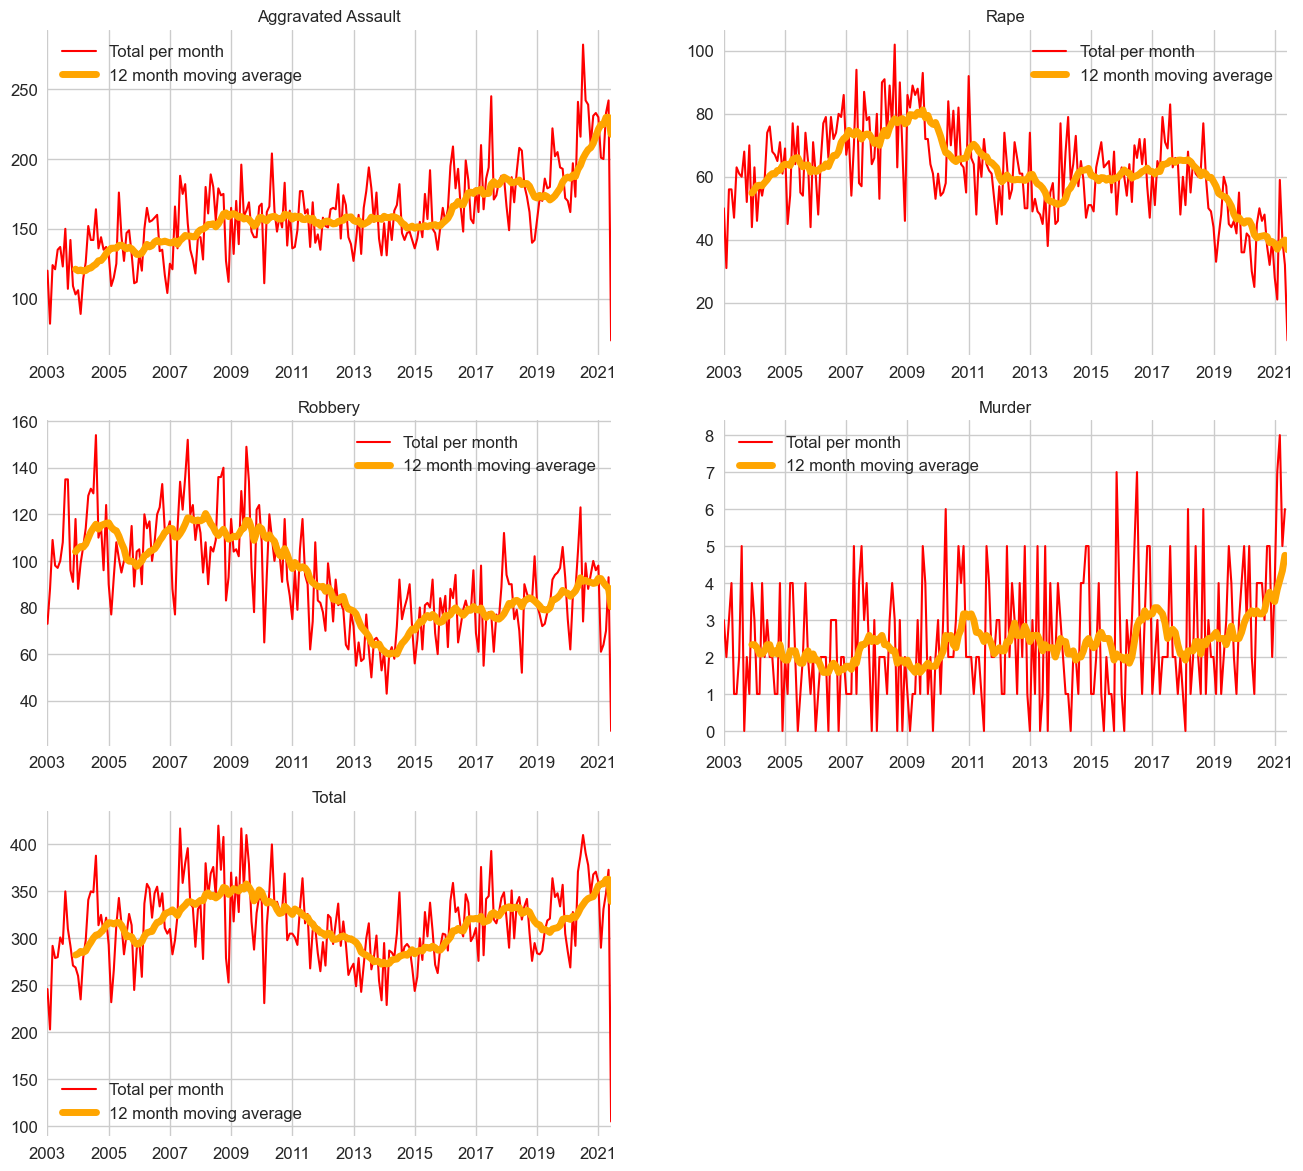

In [19]:
plt.figure(dpi=100)
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)
plt.show()

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

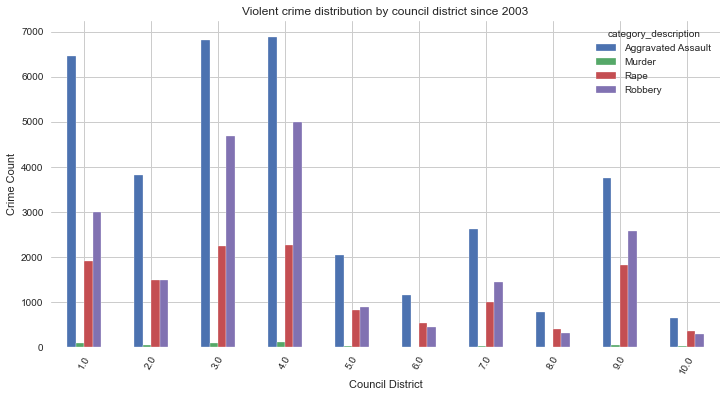

<Figure size 600x400 with 0 Axes>

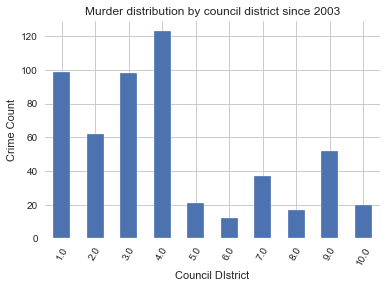

<Figure size 600x400 with 0 Axes>

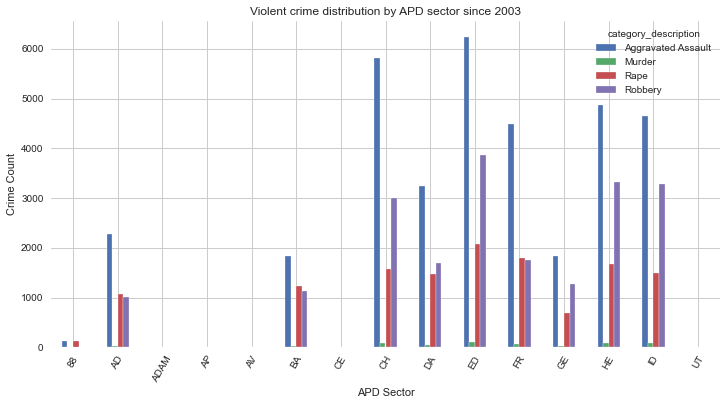

<Figure size 600x400 with 0 Axes>

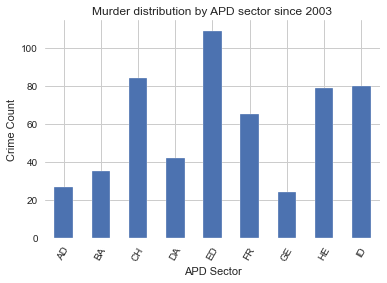

<Figure size 600x400 with 0 Axes>

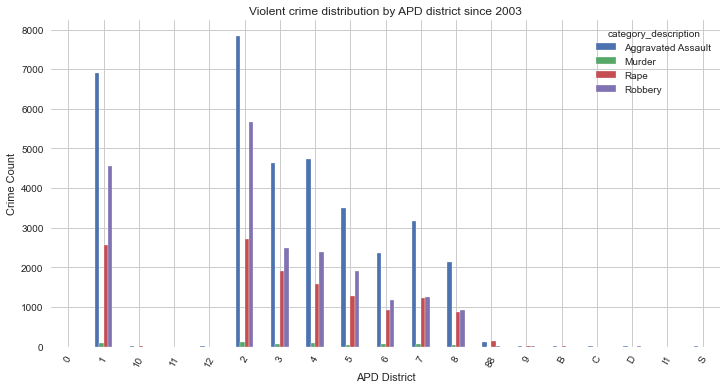

<Figure size 600x400 with 0 Axes>

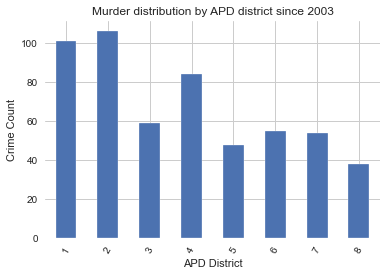

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               758      12   
CAMP / CAMPGROUND                                               43       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   404       9   
COMMUNITY CENTER                                                 9       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              282       3   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             122       6   
FIELD / WOODS                                                  289      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         263       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           764      14   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                465      13   
PARK / PLAYGROUND                                              181       1   
PARKING LOTS / GARAGE                                         4888     101   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17720     235   
REST AREA                                                        2       0   
RESTAURANTS                                                    258       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      22       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 51       0   
STREETS / HWY / ROAD / ALLEY                                  8316     107   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 112       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     13       12  
AMUSEMENT PARK                                     1        2  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        8  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      395  
BAR / NIGHT CLUB                                 158   

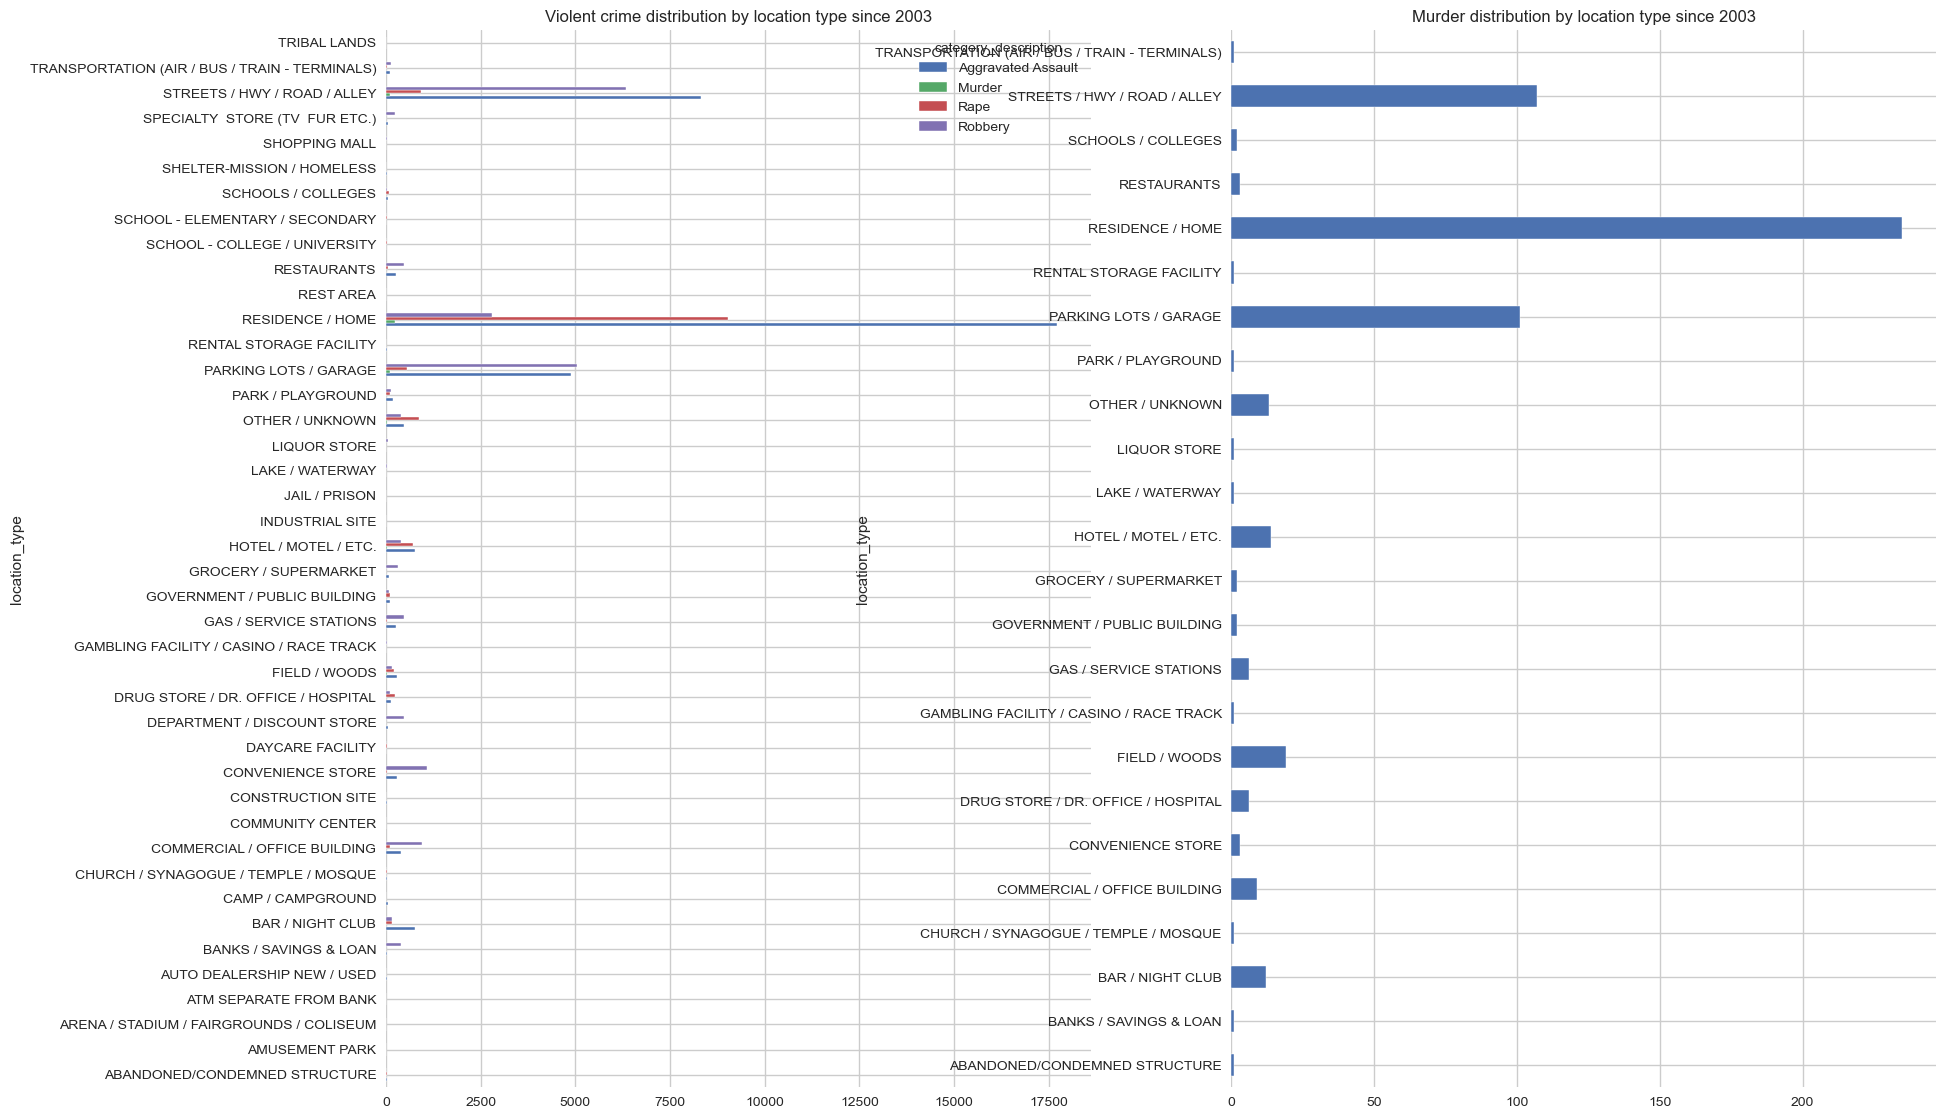

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    164
900 BLOCK E 32ND ST                 146
1137 GUNTER ST                      143
1030 NORWOOD PARK BLVD              135
500 E 7TH ST                        131
6409 SPRINGDALE RD                  131
1700 BURTON DR                      126
1071 CLAYTON LN                     115
9024 NORTHGATE BLVD                 110
6103 MANOR RD                       109
9200 NORTH PLZ                      106
1054 SPRINGDALE RD                  103
1124 RUTLAND DR                     103
9601 MIDDLE FISKVILLE RD             96
2901 S CAPITAL OF TEXAS HWY NB       96
5800 TECHNI CENTER DR                94
9515 N LAMAR BLVD                    93
1000 E 41ST ST                       92
1500 FARO DR                         91
6118 FAIRWAY ST                      90
10000 N LAMAR BLVD                   89
700 BLOCK E 8TH ST                   88
7020 GRAND CANYON DR                 88
12151 N IH 35 SVRD NB                87
8800 N IH 35 SVRD SB                 87
1515 WICKERSHAM LN                   85
9300 NORTHGATE BLVD                  84
2237 E RIVERSIDE DR                  84
2401 S LAKESHORE BLVD                84
2500 BLOCK S CONGRESS AVE            83
9010 GALEWOOD DR                     81
6855 E US 290 HWY SVRD EB            79
2201 WILLOW CREEK DR                 78
8312 N IH 35 SVRD SB                 78
7000 DECKER LN                       78
1300 CROSSING PL                     77
3909 N IH 35 SVRD NB                 77
1845 BURTON DR                       75
9001 NORTHGATE BLVD                  74
2400 WICKERSHAM LN                   73
1601 ROYAL CREST DR                  73
8926 N LAMAR BLVD                    72
4404 E OLTORF ST                     72
2101 BURTON DR                       71
4900 BLOCK MUELLER BLVD              69
2005 WILLOW CREEK DR                 69
1600 WICKERSHAM LN                   69
2200 S PLEASANT VALLEY RD            68
3603 SOUTHRIDGE DR                   68
919 E 32ND ST                        67

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
601 E 15TH ST                    3
8610 N LAMAR BLVD                3
6409 SPRINGDALE RD               3
8800 N IH 35 SVRD SB             3
6407 SPRINGDALE RD               3
4700 E RIVERSIDE DR              3
6600 ED BLUESTEIN BLVD SB        2
1200 BLOCK E 38TH HALF ST        2
8225 SAM RAYBURN DR              2
2713 S CONGRESS AVE              2
7000 DECKER LN                   2
9220 N IH 35 SVRD SB             2
10503 N LAMAR BLVD               2
2400 WICKERSHAM LN               2
9200 NORTH PLZ                   2
200 BLOCK E 6TH ST               2
8912 N LAMAR BLVD                2
4900 E OLTORF ST                 2
9601 MIDDLE FISKVILLE RD         2
1137 GUNTER ST                   2
6118 FAIRWAY ST                  2
2915 S IH 35 SVRD NB             2
11105 N IH 35 SVRD NB            2
2508 E RIVERSIDE DR              2
10610 MORADO CIR                 2
201 W 5TH ST                     2
744 W WILLIAM CANNON DR          2
7330 BLUFF SPRINGS RD            2
833 FAIRFIELD DR                 2
1050 SPRINGDALE RD               2
815 W SLAUGHTER LN               2
9010 GALEWOOD DR                 2
1711 RUTLAND DR                  2
605 MASTERSON PASS               2
2501 ANKEN DR                    2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")